# Mod01 Project - Main Workbook

This is using the cleaned CSV file created in the Matt_Clean_Forreal File

![WhitePeopleRenovatingHouses](https://media1.tenor.com/images/742a0a621a699be370f3a447e8492d33/tenor.gif?itemid=12285764 "WhitePeopleRenovatingHouses")

## Does Renovation Effect House Price?

Here we will Ask 3 question:
    1. Does the house price go down as the age of the building increase?
    2. Does the the house price go down as time since renovation increases?
    3. If the house was not renovated:
           ->  Does the house price decrecre more than if it would have been renovated.

In [1]:
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('kc_house_data_clean.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,long,sqft_living15,sqft_lot15,year,month,day,month_year,price_bands,price_list_level,yr_built_bands
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,-122.257,1340,5650,2014,10,13,13-2014,200K to 300K,3,1950
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,-122.319,1690,7639,2014,12,9,9-2014,500K to 600K,6,1950
2,2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,...,-122.233,2720,8062,2015,2,25,25-2015,100K to 200K,2,1930
3,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,-122.393,1360,5000,2014,12,9,9-2014,600K to 700K,7,1960
4,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,-122.045,1800,7503,2015,2,18,18-2015,500K to 600K,6,1980


Drop "unnamed: 0" Column

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
feilds = list(df.columns)
feilds

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'year',
 'month',
 'day',
 'month_year',
 'price_bands',
 'price_list_level',
 'yr_built_bands']

### Correlation:

In [5]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,price_list_level,yr_built_bands
id,1.000000,-0.016776,0.002322,0.005126,-0.012272,-0.131923,0.018564,-0.003603,0.011758,-0.023730,...,-0.008214,-0.001794,0.020637,-0.002748,-0.138570,0.009882,-0.011585,0.002197,-0.006079,0.020660
price,-0.016776,1.000000,0.315950,0.525886,0.701915,0.089874,0.256789,0.264310,0.393498,0.036003,...,-0.053479,0.306628,0.022028,0.585247,0.082852,0.003704,-0.009950,-0.014644,0.822727,0.055349
bedrooms,0.002322,0.315950,1.000000,0.527870,0.593176,0.033599,0.183694,-0.002056,0.080736,0.023429,...,-0.158624,-0.011637,0.136554,0.404524,0.031893,-0.009159,-0.000802,-0.009514,0.342545,0.160627
bathrooms,0.005126,0.525886,0.527870,1.000000,0.755741,0.088363,0.502547,0.063625,0.186000,-0.126493,...,-0.204895,0.024160,0.224872,0.569850,0.088303,-0.026640,0.007506,-0.005065,0.518502,0.505856
sqft_living,-0.012272,0.701915,0.593176,0.755741,1.000000,0.173446,0.353913,0.104634,0.281703,-0.059428,...,-0.199876,0.052083,0.241186,0.756388,0.184343,-0.029064,0.012084,-0.007331,0.669371,0.318483
sqft_lot,-0.131923,0.089874,0.033599,0.088363,0.173446,1.000000,-0.004830,0.021457,0.075050,-0.008810,...,-0.129598,-0.085531,0.230220,0.144752,0.718204,0.005616,-0.002596,0.000271,0.102090,0.054515
floors,0.018564,0.256789,0.183694,0.502547,0.353913,-0.004830,1.000000,0.020790,0.028389,-0.264048,...,-0.059587,0.049195,0.125897,0.280041,-0.010733,-0.022412,0.014216,-0.006396,0.297807,0.489031
waterfront,-0.003603,0.264310,-0.002056,0.063625,0.104634,0.021457,0.020790,1.000000,0.380543,0.016657,...,0.028921,-0.012163,-0.037633,0.083820,0.030657,-0.005023,0.008197,0.013728,0.128953,-0.023974
view,0.011758,0.393498,0.080736,0.186000,0.281703,0.075050,0.028389,0.380543,1.000000,0.045655,...,0.085050,0.006304,-0.077722,0.278914,0.073080,0.001219,-0.005171,0.010671,0.325519,-0.053845
condition,-0.023730,0.036003,0.023429,-0.126493,-0.059428,-0.008810,-0.264048,0.016657,0.045655,1.000000,...,0.002794,-0.015273,-0.105814,-0.093012,-0.003092,-0.045847,0.022398,-0.004718,0.042028,-0.363211


Display in a comparioson Grid:

Create a DataFrame dropping unnessisarry columns...

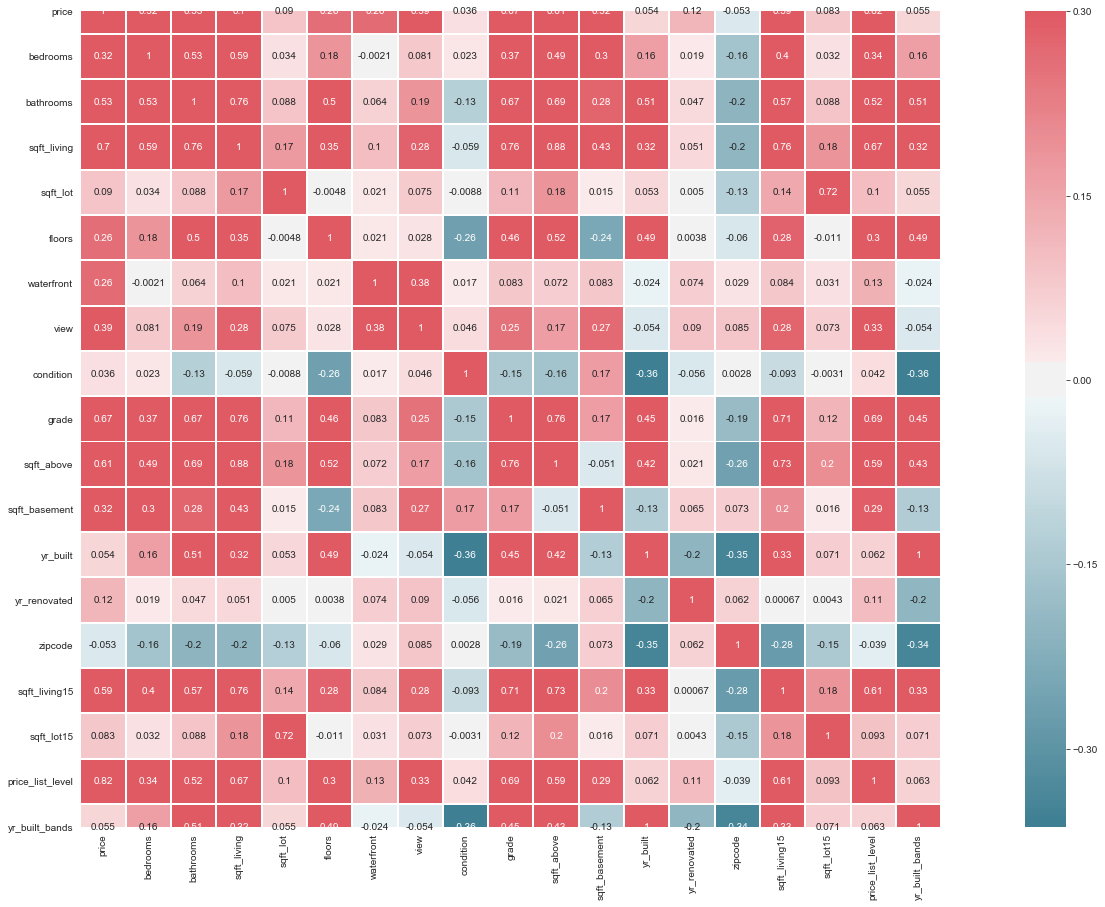

In [6]:
df_corr_heatmap = df.drop(columns=['id', 'lat', 'long', 'year', 'month', 'day',])
corr = df_corr_heatmap.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(30, 15))
ax = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=1, cbar_kws={"shrink": 1})

# Functions!

### Add in Correlation Calculator

In [7]:
def mean_normalize(var):
    norm = []
    
    mean = sum(var)/len(var)
    
    for i in var:
        norm.append(i-mean)
    
    return norm

def dot_product(x, y):
    prodcut = 0
    
    for i in range(len(x)):
        prd = x[i]*y[i]
        prodcut += prd
    return prodcut

def covariance(var1, var2):
    n = len(var1)
    x = mean_normalize(var1)
    y = mean_normalize(var2)
    
    dot_product(x, y)
    
def correlation(var1, var2): # Calculates the "r" value.
    
    if len(var1) != len(var2):
        return 'The lengths of both the lists should be equal.' 
    else: 
       
        mean_norm_var1 = mean_normalize(var1)
        mean_norm_var2 = mean_normalize(var2)
        
        var1_dot_var2 = dot_product(mean_norm_var1, mean_norm_var2)
        
        var1_squared = [i * i for i in mean_norm_var1]
        var2_squared = [i * i for i in mean_norm_var2]
        
        return round(var1_dot_var2 / math.sqrt(sum(var1_squared) * sum(var2_squared)), 3)

### Add Regrestion Line Calculator

In [8]:
def calc_slope(xs, ys):

    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

def calc_intercept(xs, ys):

    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return c

def reg_line (m, c, X):
    
    return [(m*x)+c for x in X]

def sum_sq_err(ys_real, ys_predicted):

    sse =  sum((ys_predicted - ys_real) * (ys_predicted - ys_real))
    
    return sse

def r_squared(ys_real, ys_predicted):
    
    # Calculate Y_mean , squared error for regression and mean line , and calculate r-squared
    y_mean = [np.mean(ys_real) for y in ys_real]

    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    # Calculate r-squared 
    r_sq =  1 - (sq_err_reg/sq_err_y_mean)
    
    return r_sq

def reg_basic_and_plot(X, Y, title, X_Lable, Y_Lable):
    
    m = calc_slope(X,Y)
    c = calc_intercept(X,Y)
    Y_pred = reg_line(m, c, X)
    r = correlation(X,Y)
    r_sqrd = r_squared(Y,Y_pred)
    
    print ('Basic Regression Diagnostics')
    print ('----------------------------')
    print ('Sample Size:', len(X))
    print ('Slope:', round(m, 3))
    print ('Y-Intercept:', round(c, 3))
    print ('Correlation:', r)
    print ('R-Squared:', round(r_sqrd, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m, 2),'* X +', round(c, 2))
    
    plt.figure(figsize=(15,10))
    plt.scatter(X, Y, color='skyblue', label='data')
    plt.plot(X, Y_pred, label='regression line', linewidth=4)
    plt.xlabel(X_Lable)
    plt.ylabel(Y_Lable)
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    return None

def compare_reg_basic_and_plot(X, Y, L, P, title, X_Lable, Y_Lable):
    
    # X & Y Results
    m1 = calc_slope(X,Y)
    c1 = calc_intercept(X,Y)
    Y_pred = reg_line(m1, c1, X)
    r1 = correlation(X,Y)
    r_sqrd1 = r_squared(Y,Y_pred)
    
    print ('Data_1 Regression Diagnostics')
    print ('----------------------------')
    print ('Sample Size:', len(X))
    print ('Slope:', round(m1, 2))
    print ('Y-Intercept:', round(c1, 2))
    print ('Correlation:', r1)
    print ('R-Squared:', round(r_sqrd1, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m1, 2),'* X +', round(c1, 2))
    
    # L & P Results
    m2 = calc_slope(L,P)
    c2 = calc_intercept(L,P)
    P_pred = reg_line(m2, c2, L)
    r2 = correlation(X,Y)
    r_sqrd2 = r_squared(Y,Y_pred)
    
    print ('\n\nData_2 Regression Diagnostics')
    print ('----------------------------')
    print ('Sample Size:', len(L))
    print ('Slope:', round(m2, 2))
    print ('Y-Intercept:', round(c2, 2))
    print ('Correlation:', r2)
    print ('R-Squared:', round(r_sqrd2, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m2, 2),'* X +', round(c2, 2))
    
    
    # Output the Graph
    plt.figure(figsize=(15,10))
    plt.scatter(X, Y, color='lightblue', label='Data_1')
    plt.scatter(L, P, color='orange', label='Data_2')
    plt.plot(X, Y_pred, label='regression line_1', linewidth=4, color='blue')
    plt.plot(L, P_pred, label='regression line_2', linewidth=4, color='red')
    plt.xlabel(X_Lable)
    plt.ylabel(Y_Lable)
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    return None

# Creating the Comparison Fields Required for Analysis

### Create:  "age" column

In [9]:
now = 2016

In [10]:
df['age'] = now - df['yr_built']

### Create: Renovated Yes/No

In [11]:
is_renovated = df['yr_renovated']
is_renovated.describe().apply(lambda x: format(x, 'f'))
temp = []
for ren in is_renovated:
    if ren > 0:
        temp.append('renovated')
    else:
        temp.append('not_renovated')
        
df['is_ren'] = temp
        

In [12]:
df['is_ren'].unique()

array(['not_renovated', 'renovated'], dtype=object)

### Create: Sale Count column

Shows if this property is on the list mulitiple times. 

Organised by Data: 
        - If this is the first occurance of the ID value = 1
        - If this is the Second occurance of the ID value = 2
        - etc...

Create a new DataFrame soreted by Date sold.

In [13]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,year,month,day,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,5650,2014,10,13,13-2014,200K to 300K,3,1950,61,not_renovated
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7639,2014,12,9,9-2014,500K to 600K,6,1950,65,renovated
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,8062,2015,2,25,25-2015,100K to 200K,2,1930,83,not_renovated
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,5000,2014,12,9,9-2014,600K to 700K,7,1960,51,not_renovated
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,7503,2015,2,18,18-2015,500K to 600K,6,1980,29,not_renovated


In [14]:
df_sorted_date = df

Convert the Data to datetime format & Make it the index

In [15]:
pd.to_datetime(df_sorted_date['date'], format='%Y%m%d', errors='ignore')

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21590     5/21/2014
21591     2/23/2015
21592     6/23/2014
21593     1/16/2015
21594    10/15/2014
Name: date, Length: 21595, dtype: object

In [16]:
df_sorted_date.set_index('date', inplace=True)

In [17]:
df_sorted_date.sort_index(ascending=False, inplace=True)

In [18]:
df_sorted_date

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,year,month,day,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,7227800055,199500.0,4,2.00,1750,8116,1.0,0.0,0.0,4,...,7865,2014,9,9,9-2014,100K to 200K,2,1940,73,not_renovated
9/9/2014,1421069123,214000.0,3,1.00,1020,9147,1.0,0.0,0.0,4,...,9700,2014,9,9,9-2014,200K to 300K,3,1900,116,renovated
9/9/2014,3323069084,620000.0,4,2.50,1840,220308,2.0,0.0,0.0,3,...,65340,2014,9,9,9-2014,600K to 700K,7,2000,16,not_renovated
9/9/2014,7227500450,222900.0,2,1.00,860,5800,1.0,0.0,0.0,5,...,6000,2014,9,9,9-2014,200K to 300K,3,1940,74,not_renovated
9/9/2014,1370803445,1140000.0,4,1.75,3080,6500,1.0,0.0,0.0,4,...,5711,2014,9,9,9-2014,900K to 1M,10,1940,75,not_renovated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/12/2015,7504100360,565000.0,4,2.50,2500,12090,1.0,0.0,0.0,3,...,12760,2015,1,12,12-2015,500K to 600K,6,1980,33,not_renovated
1/12/2015,4219400465,950000.0,4,2.00,2490,4600,1.5,0.0,2.0,3,...,5000,2015,1,12,12-2015,900K to 1M,10,1920,90,not_renovated
1/12/2015,2215450100,330000.0,4,2.50,2240,7589,2.0,0.0,0.0,3,...,7300,2015,1,12,12-2015,300K to 400K,4,1990,22,not_renovated


#### Create list of unique ID's:

In [19]:
unique_ids = list(df['id'].unique())
unique_ids[:4]

[7227800055, 1421069123, 3323069084, 7227500450]

Add a counter column to the datalist:

In [20]:
def id_with_counter(data):
    dup_dict = {}
    values = sorted(list(map(lambda x: x, data)))
    
    for val in values:
            dup_dict[val] = 1

    return dup_dict

In [21]:
unique_ids_dict = id_with_counter(unique_ids)
unique_ids_dict

{1000102: 1,
 1200019: 1,
 1200021: 1,
 2800031: 1,
 3600057: 1,
 3600072: 1,
 3800008: 1,
 5200087: 1,
 6200017: 1,
 7200080: 1,
 7200179: 1,
 7400062: 1,
 7600057: 1,
 7600065: 1,
 7600125: 1,
 7600136: 1,
 9000025: 1,
 11200070: 1,
 11200290: 1,
 11200400: 1,
 11300120: 1,
 11500240: 1,
 11500890: 1,
 11501160: 1,
 11501310: 1,
 11501330: 1,
 11510310: 1,
 11510700: 1,
 11520030: 1,
 11520200: 1,
 11520370: 1,
 11520640: 1,
 11900140: 1,
 13001215: 1,
 13001795: 1,
 13001991: 1,
 13002460: 1,
 13002495: 1,
 16000015: 1,
 16000200: 1,
 16000397: 1,
 16000435: 1,
 16000545: 1,
 23500180: 1,
 23500190: 1,
 23500220: 1,
 23520190: 1,
 23520380: 1,
 31000165: 1,
 31200020: 1,
 34000005: 1,
 34001160: 1,
 34001304: 1,
 34001540: 1,
 34001765: 1,
 37000335: 1,
 37000435: 1,
 40000228: 1,
 40000235: 1,
 40000362: 1,
 40000471: 1,
 40000553: 1,
 40000669: 1,
 40001065: 1,
 41000454: 1,
 42000006: 1,
 42000065: 1,
 42000127: 1,
 42000130: 1,
 42000245: 1,
 46100204: 1,
 46100350: 1,
 46100504

Now we use this to iterate through the DataFrame list of id's. If it finds the id it; 

First appends the number next to the unique_id list... 
Then added 1 to that number.

In [22]:
def ocurrance_finder(data, unique_dict):
    new_list = []
    
    for d in data:
        for u, v in unique_dict.items():
            if d == u:
                new_list.append(v)
                unique_dict[u] += 1
    return new_list

Apply occurance finder to the soreted data set.

<font color='red'>Loading Time</font>

This may take a minute or 2 to run as it it is iterating for each row in the DataFrame through the unique ID's list

In [23]:
sale_count_list = ocurrance_finder(df_sorted_date['id'], unique_ids_dict)
print(len(sale_count_list))
df_sorted_date.shape

21595


(21595, 29)

In [24]:
df_sorted_date['sale_count'] = sale_count_list

In [25]:
df_sorted_date.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,year,month,day,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren,sale_count
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,7227800055,199500.0,4,2.00,1750,8116,1.0,0.0,0.0,4,...,2014,9,9,9-2014,100K to 200K,2,1940,73,not_renovated,1
9/9/2014,1421069123,214000.0,3,1.00,1020,9147,1.0,0.0,0.0,4,...,2014,9,9,9-2014,200K to 300K,3,1900,116,renovated,1
9/9/2014,3323069084,620000.0,4,2.50,1840,220308,2.0,0.0,0.0,3,...,2014,9,9,9-2014,600K to 700K,7,2000,16,not_renovated,1
9/9/2014,7227500450,222900.0,2,1.00,860,5800,1.0,0.0,0.0,5,...,2014,9,9,9-2014,200K to 300K,3,1940,74,not_renovated,1
9/9/2014,1370803445,1140000.0,4,1.75,3080,6500,1.0,0.0,0.0,4,...,2014,9,9,9-2014,900K to 1M,10,1940,75,not_renovated,1


In [26]:
df_sorted_date['sale_count'].unique()

array([1, 2, 3])

### Using this, can we see if a house which has been sold for a second time has had a renovation done? And has that had an efect on its price.

This is probable done by extracting the id's which occure multiple times into a new data frame.

    1. Create a list id's of the duplicated ids - This equated to house that were sold twice
    2. Use list to extract new DataFrames
    3. Compare First Sale to Second Sale

In [27]:
"""This is using a duplicator finder from a previous project"""
def dup_counter(data):
    dup_dict = {}
    dup_list = []
    values = sorted(list(map(lambda x: x, data)))
    
    for val in values:
        if val in dup_dict: 
            dup_dict[val] += 1
        else:
            dup_dict[val] = 1

    sorted_dup_dict = sorted(dup_dict.items(), key = lambda x: x[1], reverse = True)
    dup_temp = list(sorted_dup_dict)
    
    for d in dup_temp:
        if d[1] > 1:
            dup_list.append(d)
    return dup_list


In [28]:
dup_ids_list = dup_counter(df['id'])
dup_ids_list[:4]

[(795000620, 3), (1000102, 2), (7200179, 2), (109200390, 2)]

In [29]:
def just_ids(data):
    new_list = []
    for d in dup_ids_list:
        new_list.append(d[0])
    return new_list

In [30]:
dup_ids = just_ids(dup_ids_list)

In [31]:
print(len(dup_ids), "Properties sold multiple times in the data set.")
dup_ids[:4]

176 Properties sold multiple times in the data set.


[795000620, 1000102, 7200179, 109200390]

#### Extract duplicate ids list to a new DataFrame of just houses sold twice

In [32]:
df_multi_sale = df_sorted_date[df_sorted_date['id'].isin(dup_ids)]

In [33]:
df_multi_sale.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,year,month,day,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren,sale_count
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,7227800055,199500.0,4,2.0,1750,8116,1.0,0.0,0.0,4,...,2014,9,9,9-2014,100K to 200K,2,1940,73,not_renovated,1
9/9/2014,8062900070,272000.0,5,1.5,2550,6300,1.0,0.0,0.0,4,...,2014,9,9,9-2014,200K to 300K,3,1950,57,not_renovated,1
9/5/2014,1545800290,215000.0,4,2.5,1700,6675,2.0,0.0,0.0,3,...,2014,9,5,5-2014,200K to 300K,3,1990,19,not_renovated,1
9/5/2014,2767602141,525000.0,3,1.5,1380,4290,1.0,0.0,0.0,3,...,2014,9,5,5-2014,500K to 600K,6,1950,61,not_renovated,1
9/5/2014,1450100390,125000.0,3,1.0,920,7314,1.0,0.0,0.0,3,...,2014,9,5,5-2014,100K to 200K,2,1960,56,not_renovated,1


In [34]:
df_multi_sale.shape

(353, 30)

Seeing as there is only 1 house that was sold more than 2 times. we'll just to first and second sales.

In [35]:
df_mulit_sale_1 = df_multi_sale.loc[df_multi_sale['sale_count'] == 1]
df_mulit_sale_1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,year,month,day,price_list_level,yr_built_bands,age,sale_count
count,1.760000e+02,1.760000e+02,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0
mean,4.545319e+09,3.930217e+05,3.284091,1.805398,1743.920455,11665.380682,1.267045,0.0,0.136364,3.301136,...,-122.237523,1777.170455,10673.386364,2014.295455,6.170455,16.488636,4.244318,1955.284091,56.238636,1.0
std,2.875605e+09,2.929008e+05,1.030383,0.736875,757.734197,22861.807303,0.433912,0.0,0.662149,0.697095,...,0.130698,611.692896,16489.243128,0.457549,2.104263,8.613603,2.160019,25.274018,25.622755,0.0
min,1.000102e+06,8.500000e+04,1.000000,0.750000,580.000000,1092.000000,1.000000,0.0,0.000000,1.000000,...,-122.463000,810.000000,1334.000000,2014.000000,2.000000,1.000000,1.000000,1900.000000,3.000000,1.0
25%,1.989975e+09,2.231250e+05,3.000000,1.000000,1220.000000,5544.250000,1.000000,0.0,0.000000,3.000000,...,-122.337250,1360.000000,6000.000000,2014.000000,5.000000,8.000000,3.000000,1940.000000,38.000000,1.0
50%,4.085211e+09,3.129750e+05,3.000000,1.750000,1620.000000,8011.500000,1.000000,0.0,0.000000,3.000000,...,-122.284000,1610.000000,7950.000000,2014.000000,6.000000,18.000000,4.000000,1950.000000,57.000000,1.0
75%,7.433280e+09,4.576250e+05,4.000000,2.250000,2080.000000,10110.000000,1.500000,0.0,0.000000,4.000000,...,-122.172000,2020.000000,9587.250000,2015.000000,8.000000,24.000000,5.000000,1970.000000,73.000000,1.0
max,9.834201e+09,1.900000e+06,6.000000,4.500000,5290.000000,224442.000000,3.000000,0.0,4.000000,5.000000,...,-121.734000,4060.000000,183897.000000,2015.000000,12.000000,31.000000,10.000000,2010.000000,116.000000,1.0


In [36]:
df_mulit_sale_2 = df_multi_sale.loc[df_multi_sale['sale_count'] == 2]
df_mulit_sale_2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,year,month,day,price_list_level,yr_built_bands,age,sale_count
count,1.760000e+02,1.760000e+02,176.000000,176.000000,176.000000,176.000000,176.000000,176.0,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.0
mean,4.545319e+09,4.479699e+05,3.284091,1.805398,1743.920455,11665.380682,1.267045,0.0,0.136364,3.301136,...,-122.237523,1777.170455,10673.386364,2014.562500,6.136364,15.215909,4.772727,1955.284091,56.238636,2.0
std,2.875605e+09,2.947436e+05,1.030383,0.736875,757.734197,22861.807303,0.433912,0.0,0.662149,0.697095,...,0.130698,611.692896,16489.243128,0.497494,4.216110,8.387676,2.217990,25.274018,25.622755,0.0
min,1.000102e+06,8.200000e+04,1.000000,0.750000,580.000000,1092.000000,1.000000,0.0,0.000000,1.000000,...,-122.463000,810.000000,1334.000000,2014.000000,1.000000,1.000000,1.000000,1900.000000,3.000000,2.0
25%,1.989975e+09,2.403500e+05,3.000000,1.000000,1220.000000,5544.250000,1.000000,0.0,0.000000,3.000000,...,-122.337250,1360.000000,6000.000000,2014.000000,2.000000,7.750000,3.000000,1940.000000,38.000000,2.0
50%,4.085211e+09,3.700000e+05,3.000000,1.750000,1620.000000,8011.500000,1.000000,0.0,0.000000,3.000000,...,-122.284000,1610.000000,7950.000000,2015.000000,4.000000,16.000000,4.000000,1950.000000,57.000000,2.0
75%,7.433280e+09,5.500000e+05,4.000000,2.250000,2080.000000,10110.000000,1.500000,0.0,0.000000,4.000000,...,-122.172000,2020.000000,9587.250000,2015.000000,11.000000,22.250000,6.000000,1970.000000,73.000000,2.0
max,9.834201e+09,1.940000e+06,6.000000,4.500000,5290.000000,224442.000000,3.000000,0.0,4.000000,5.000000,...,-121.734000,4060.000000,183897.000000,2015.000000,12.000000,31.000000,10.000000,2010.000000,116.000000,2.0


Data_1 Regression Diagnostics
----------------------------
Sample Size: 176
Slope: -3061.95
Y-Intercept: 565221.7
Correlation: -0.268
R-Squared: 0.072
----------------------------
Model: Y = -3061.95 * X + 565221.7


Data_2 Regression Diagnostics
----------------------------
Sample Size: 176
Slope: -2143.4
Y-Intercept: 568511.76
Correlation: -0.268
R-Squared: 0.072
----------------------------
Model: Y = -2143.4 * X + 568511.76


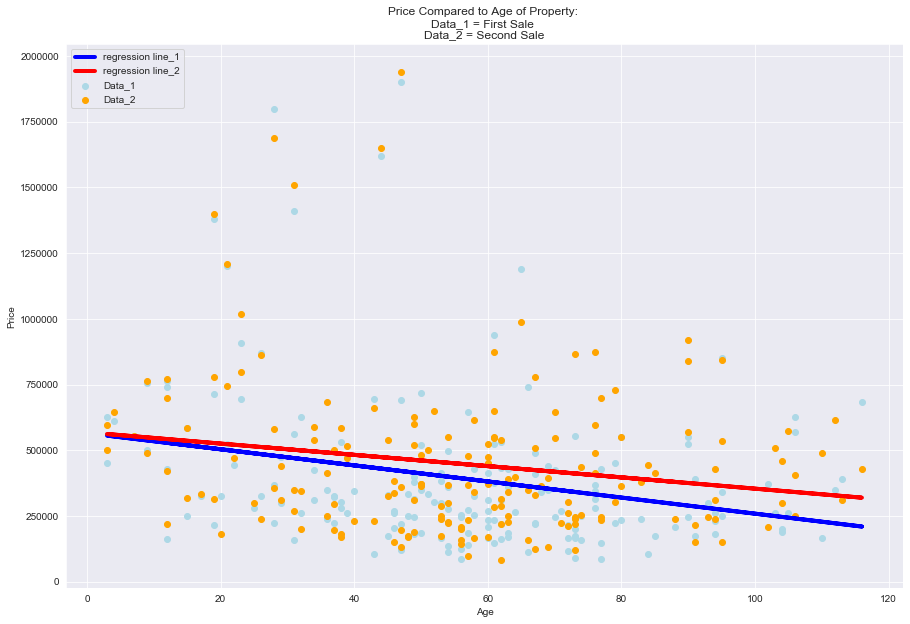

In [37]:
compare_reg_basic_and_plot(df_mulit_sale_1['age'], df_mulit_sale_1['price'], df_mulit_sale_2['age'], df_mulit_sale_2['price'], 
                           "Price Compared to Age of Property: \nData_1 = First Sale \nData_2 = Second Sale", "Age", "Price")

The above graph shows the effect on Price between first and second sale relative to the age of the house.

This shows that older houses actually increase in more that younger house on thier second sale.

It is about $1000 more for a year of age in the second sale price. 

### Check is Renovated for these data frames Yes / No

In [38]:
df_mulit_sale_1_ren = df_mulit_sale_1.loc[df_mulit_sale_1['is_ren']== 'renovated']
len(df_mulit_sale_1_ren)

4

In [39]:
df_mulit_sale_1_not_ren = df_mulit_sale_1.loc[df_mulit_sale_1['is_ren']== 'not_renovated']
len(df_mulit_sale_1_not_ren)

172

In [40]:
df_mulit_sale_2_ren = df_mulit_sale_2.loc[df_mulit_sale_2['is_ren']== 'renovated']
len(df_mulit_sale_2_ren)

4

In [41]:
df_mulit_sale_2_not_ren = df_mulit_sale_2.loc[df_mulit_sale_2['is_ren']== 'not_renovated']
len(df_mulit_sale_2_not_ren)

172

Unfortunatly, there are not houses that were renovated for a second sale :( so we cannot comapre the price for houses before & after renovation.

However with a data set over larger amount of time the code is there to be used.

# Create: age since renovation column

Creating the new column

In [42]:
temp_age_since_ren = df['yr_renovated']
temp = []
i = 0
for val in temp_age_since_ren:
    if val > 0:
        val = now - df['yr_renovated'][i]
        temp.append(val)
        i += 1
    else:
        val = now - df['yr_built'][i]
        temp.append(val)
        i += 1

df['age_since_ren'] = temp

In [43]:
df['age_since_ren'].unique()

array([ 73,  51,  16,  74,  75,  27,   3,  22,  48,   8,  14,  15,  41,
        47,  30,  10,  60,  70,  38,  55,  91,  11,  29,   5,  52,  61,
        49,  63,  92,  59,  44,   2,  33,  37,  57,  17,  18,  20, 103,
        69,  94,  25,  31,  66,  13,  32,  64,  12,  35,  50,  34,  45,
        72, 116,  98,   7,  42,  39,  96,  68,  65, 105,  56,  46,  36,
        24, 114,  43,  93,  58,  67,  53,  26,  88, 110,   9,  79,  62,
        19,  23,  76,  71, 109,  95,  89,  80,  28,   6,  54,  97, 100,
       108,  40, 115,  84, 112,  86, 106,  21, 104,  77,  90, 107,  99,
        85,  83,  78, 101, 111, 113,   4,  87,  81, 102,  82,   1])

In [44]:
print(df['age'].head())
print(df['age_since_ren'].head())

date
9/9/2014     73
9/9/2014    116
9/9/2014     16
9/9/2014     74
9/9/2014     75
Name: age, dtype: int64
date
9/9/2014    73
9/9/2014    51
9/9/2014    16
9/9/2014    74
9/9/2014    75
Name: age_since_ren, dtype: int64


# Time to Renovation in Years

##  <font color='red'>!!! WARNING !!!</font>

If not renovated then this will = - yr_built 

Only use this value for properties that have been renovated.


This was done like this as I didn't want it to be zero as then it would appear as though the house was renovated that year. the negtive number should trigger warning signgs if this value is used inaproprately.

In [45]:
time_to_ren = df['yr_renovated'] - df['yr_built']
""" WARNING: if not renovated then this will = - yr_built only use this value for properties that have been renovated"""
df['time_to_ren'] = time_to_ren

In [46]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,day,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren,sale_count,age_since_ren,time_to_ren
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,7227800055,199500.0,4,2.00,1750,8116,1.0,0.0,0.0,4,...,9,9-2014,100K to 200K,2,1940,73,not_renovated,1,73,-1943
9/9/2014,1421069123,214000.0,3,1.00,1020,9147,1.0,0.0,0.0,4,...,9,9-2014,200K to 300K,3,1900,116,renovated,1,51,65
9/9/2014,3323069084,620000.0,4,2.50,1840,220308,2.0,0.0,0.0,3,...,9,9-2014,600K to 700K,7,2000,16,not_renovated,1,16,-2000
9/9/2014,7227500450,222900.0,2,1.00,860,5800,1.0,0.0,0.0,5,...,9,9-2014,200K to 300K,3,1940,74,not_renovated,1,74,-1942
9/9/2014,1370803445,1140000.0,4,1.75,3080,6500,1.0,0.0,0.0,4,...,9,9-2014,900K to 1M,10,1940,75,not_renovated,1,75,-1941


## Create new column with the "log price"

Firstly lets take a look at the price distrobution.

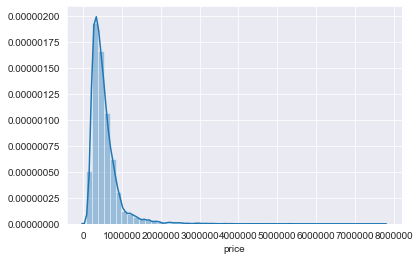

In [47]:
sns.distplot(df['price'])

In [48]:
df['log_price'] = np.log(df['price'])

Is the price is a logarithmly Scale?

In [49]:
log_price = np.log(df['price'])

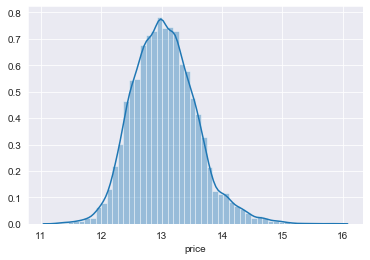

In [52]:
sns.distplot(log_price)

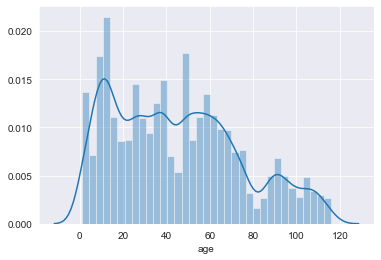

In [53]:
sns.distplot(df['age'])

# Create: Data Frame - Renovated House's



Create a new DataFrame but just for houses which have been renovated

In [54]:
df_ren = df.loc[df['yr_renovated'] != 0]

In [55]:
df_ren.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren,sale_count,age_since_ren,time_to_ren,log_price
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,1421069123,214000.0,3,1.00,1020,9147,1.0,0.0,0.0,4,...,9-2014,200K to 300K,3,1900,116,renovated,1,51,65,12.273731
9/9/2014,4045500130,154000.0,2,1.00,1040,20524,1.0,0.0,3.0,3,...,9-2014,100K to 200K,2,1940,67,renovated,1,27,40,11.944708
9/8/2014,2301400276,865000.0,4,2.50,2520,4950,2.0,0.0,0.0,3,...,8-2014,800K to 900K,9,1900,110,renovated,1,14,96,13.670485
9/8/2014,1483300570,905000.0,4,2.50,3300,10250,1.0,0.0,0.0,3,...,8-2014,900K to 1M,10,1940,70,renovated,1,25,45,13.715690
9/8/2014,537000130,360000.0,1,2.25,2060,10600,1.5,0.0,0.0,3,...,8-2014,300K to 400K,4,1920,89,renovated,1,33,56,12.793859


In [56]:
df_ren.shape

(744, 33)

Median Age of Properties if Renovated: 74.5 Years Old


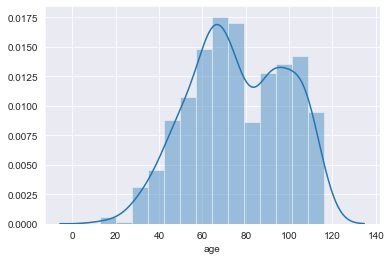

In [57]:
print("Median Age of Properties if Renovated:", df_ren['age'].median(), "Years Old")
sns.distplot(df_ren['age'])

If renovated: show the distributuion of time to renovation. 

Median Age to of Property When Renovated: 54.0 Years Old


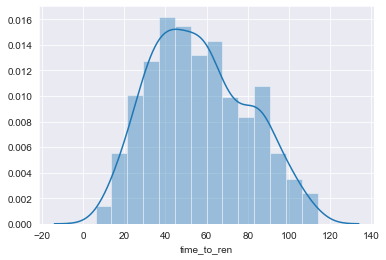

In [58]:
print("Median Age to of Property When Renovated:", df_ren['time_to_ren'].median(), "Years Old")
sns.distplot(df_ren['time_to_ren'])

Basic Regression Diagnostics
----------------------------
Sample Size: 744
Slope: -1908.088
Y-Intercept: 914955.282
Correlation: -0.067
R-Squared: 0.005
----------------------------
Model: Y = -1908.09 * X + 914955.28


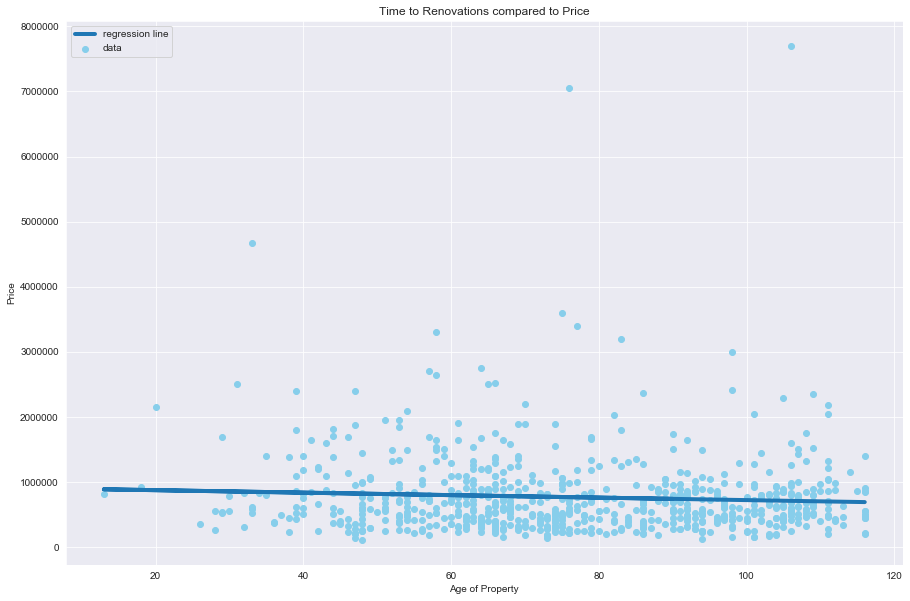

In [62]:
reg_basic_and_plot(df_ren['age'], df_ren['price'], 
                   "Time to Renovations compared to Price", "Age of Property", "Price")

# 1b. DataFrame - Non_Renovated House's

There was a house that it's year built was zero so it must be excluded from this data frame.

In [65]:
df_non_ren = df.loc[(df['yr_renovated'] == 0) & (df['yr_built'] != 0)]

In [66]:
print(df_non_ren.shape)
df_non_ren.head()

(20851, 33)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,month_year,price_bands,price_list_level,yr_built_bands,age,is_ren,sale_count,age_since_ren,time_to_ren,log_price
date,,,,,,,,,,,,,,,,,,,,,
9/9/2014,7227800055,199500.0,4,2.00,1750,8116,1.0,0.0,0.0,4,...,9-2014,100K to 200K,2,1940,73,not_renovated,1,73,-1943,12.203570
9/9/2014,3323069084,620000.0,4,2.50,1840,220308,2.0,0.0,0.0,3,...,9-2014,600K to 700K,7,2000,16,not_renovated,1,16,-2000,13.337475
9/9/2014,7227500450,222900.0,2,1.00,860,5800,1.0,0.0,0.0,5,...,9-2014,200K to 300K,3,1940,74,not_renovated,1,74,-1942,12.314479
9/9/2014,1370803445,1140000.0,4,1.75,3080,6500,1.0,0.0,0.0,4,...,9-2014,900K to 1M,10,1940,75,not_renovated,1,75,-1941,13.946539
9/9/2014,325049234,925000.0,4,2.50,3110,11422,2.0,0.0,0.0,3,...,9-2014,900K to 1M,10,1980,27,not_renovated,1,27,-1989,13.737549


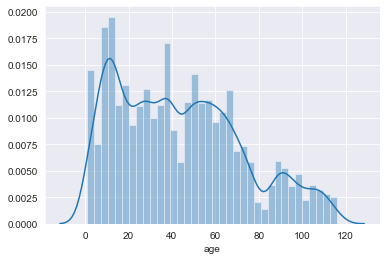

In [67]:
sns.distplot(df_non_ren['age'])

Basic Regression Diagnostics
----------------------------
Sample Size: 20851
Slope: -996.347
Y-Intercept: 575865.795
Correlation: -0.082
R-Squared: 0.007
----------------------------
Model: Y = -996.35 * X + 575865.79


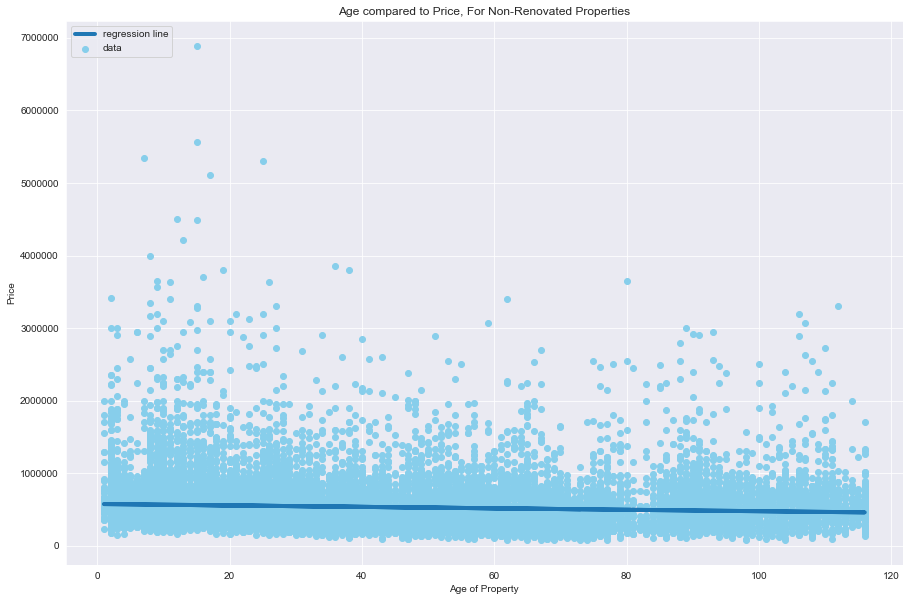

In [69]:
reg_basic_and_plot(df_non_ren['age'], df_non_ren['price'], 
                   "Age compared to Price, For Non-Renovated Properties", "Age of Property", "Price")

Data_1 Regression Diagnostics
----------------------------
Sample Size: 744
Slope: 0.0
Y-Intercept: 13.24
Correlation: 0.071
R-Squared: 0.005
----------------------------
Model: Y = 0.0 * X + 13.24


Data_2 Regression Diagnostics
----------------------------
Sample Size: 744
Slope: -0.0
Y-Intercept: 13.48
Correlation: 0.071
R-Squared: 0.005
----------------------------
Model: Y = -0.0 * X + 13.48


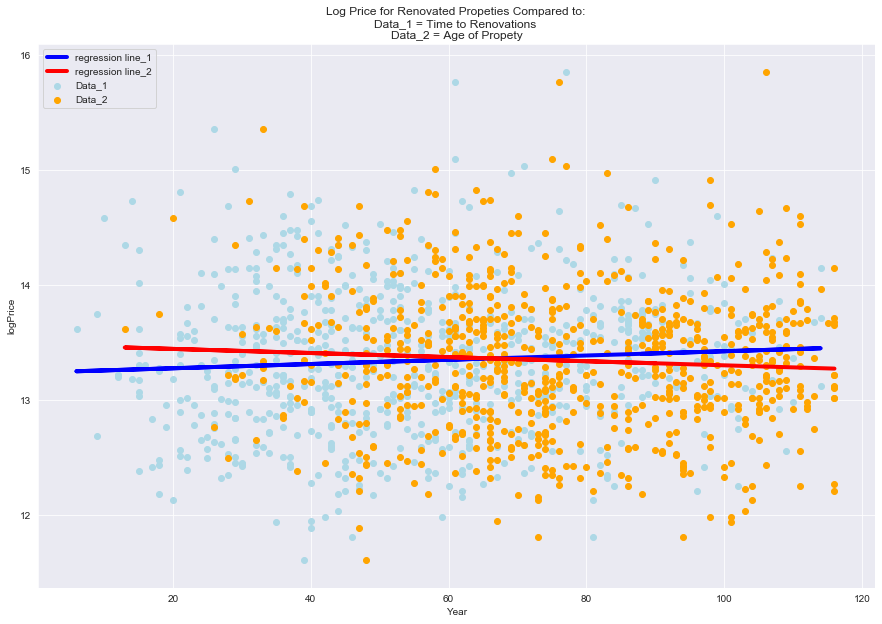

In [157]:
compare_reg_basic_and_plot(df_ren['time_to_ren'], df_ren['log_price'],
                          df_ren['age'], df_ren['log_price'],
                          "Log Price for Renovated Propeties Compared to: \nData_1 = Time to Renovations \nData_2 = Age of Propety", 
                           "Year", "logPrice")

Basic Regression Diagnostics
----------------------------
Sample Size: 744
Slope: 0.002
Y-Intercept: 13.241
Correlation: 0.071
R-Squared: 0.005
----------------------------
Model: Y = 0.0 * X + 13.24


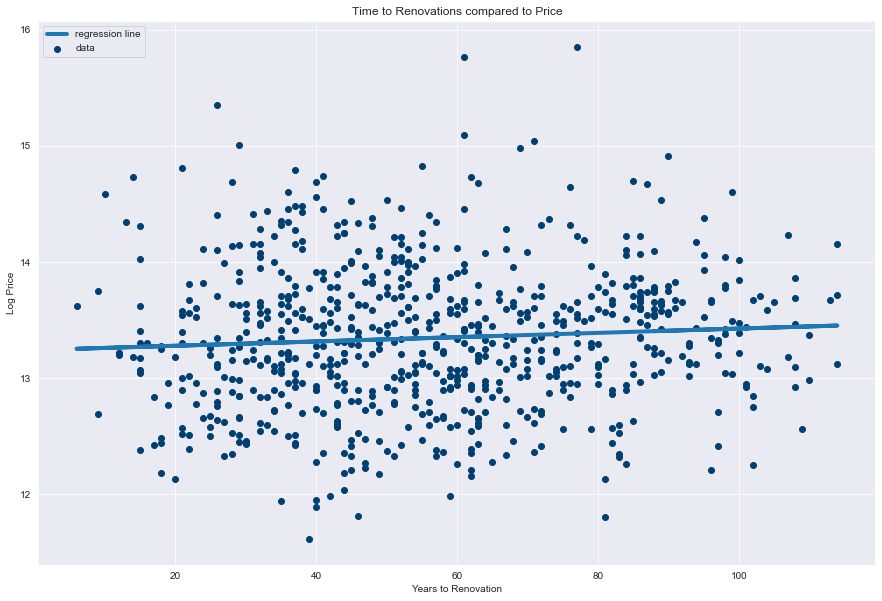

In [158]:
reg_basic_and_plot(df_ren['time_to_ren'], df_ren['log_price'], 
                   "Time to Renovations compared to Price", "Years to Renovation", "Log Price")

Price is negliagble effected by time to renovation. 

# Datasets Sample Analysis

In [109]:
total_housing_units = 902107 # From American Comunity Survey 2017
housing_units = df.shape[0]
print("Total Number of properties in KC:", total_housing_units) 
print("Total Number of properties in DataSet:", len(unique_ids))
print("Percentage of properties:", round((((len(unique_ids))/total_housing_units)*100),3),"%")
print("Age Range of properties:", "Max:", df['age'].max(), "Min:", df['age'].min())

Total Number of properties in KC: 902107
Total Number of properties in DataSet: 21418
Percentage of properties: 2.374 %
Age Range of properties: Max: 116 Min: 1


In [120]:
def extrapolate (value):
    a = value/housing_units
    return a*total_housing_units

In [173]:
extrapolate(99)

4135.614401481824

# Comparison Analysis

I wanted to do a FaceGrid, but couldn't get it to work so will have to make do with this comparison.

In [73]:
print("Renovated Properties:\n\n", df_ren.agg(['sum', 'min', 'max', 'mean', 'median']))

Renovated Properties:

                   id         price     bedrooms    bathrooms   sqft_living  \
sum     3.287525e+12  5.720630e+08  2574.000000  1715.750000  1.731569e+06   
min     3.600057e+06  1.100000e+05     1.000000     0.750000  5.200000e+02   
max     9.829200e+09  7.700000e+06    11.000000     8.000000  1.205000e+04   
mean    4.418716e+09  7.689019e+05     3.459677     2.306116  2.327378e+03   
median  3.899100e+09  6.075020e+05     3.000000     2.250000  2.200000e+03   

            sqft_lot       floors  waterfront        view    condition  ...  \
sum     1.206436e+07  1119.500000   29.000000  446.000000  2395.000000  ...   
min     1.024000e+03     1.000000    0.000000    0.000000     1.000000  ...   
max     4.782880e+05     3.000000    1.000000    4.000000     5.000000  ...   
mean    1.621553e+04     1.504704    0.038978    0.599462     3.219086  ...   
median  7.375000e+03     1.500000    0.000000    0.000000     3.000000  ...   

                                

In [74]:
print("Non-Renovated Properties:\n\n", df_non_ren.agg(['sum', 'min', 'max', 'mean', 'median']))

Non-Renovated Properties:

                   id         price      bedrooms     bathrooms   sqft_living  \
sum     9.563083e+13  1.109591e+10  70241.000000  43977.000000  4.319438e+07   
min     1.000102e+06  7.800000e+04      1.000000      0.500000  3.700000e+02   
max     9.900000e+09  6.890000e+06     10.000000      8.000000  1.354000e+04   
mean    4.586390e+09  5.321524e+05      3.368711      2.109107  2.071574e+03   
median  3.904931e+09  4.490000e+05      3.000000      2.250000  1.900000e+03   

            sqft_lot        floors  waterfront         view     condition  \
sum     3.140228e+08  31146.500000  117.000000  4590.000000  71239.000000   
min     5.200000e+02      1.000000    0.000000     0.000000      1.000000   
max     1.651359e+06      3.500000    1.000000     4.000000      5.000000   
mean    1.506032e+04      1.493765    0.005611     0.220133      3.416575   
median  7.620000e+03      1.500000    0.000000     0.000000      3.000000   

        ...                 

### Using the OLS Library:

In [98]:
f1 = 'log_price~age'
# create a fitted model in one line
model_1 = smf.ols(formula=f1, data=df).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     141.3
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           1.79e-32
Time:                        14:11:07   Log-Likelihood:                -16719.
No. Observations:               21595   AIC:                         3.344e+04
Df Residuals:                   21593   BIC:                         3.346e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1133      0.007   2007.087      0.000      13.100      13.126
age           -0.0014      0.000    -11.885      0.000      -0.002      -0.001
==============================================================================
Omnibus:                      905.953   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1135.447
Skew:                           0.455   Prob(JB):                    2.76e-247
Kurtosis:                       3.659   Cond. No.                         98.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

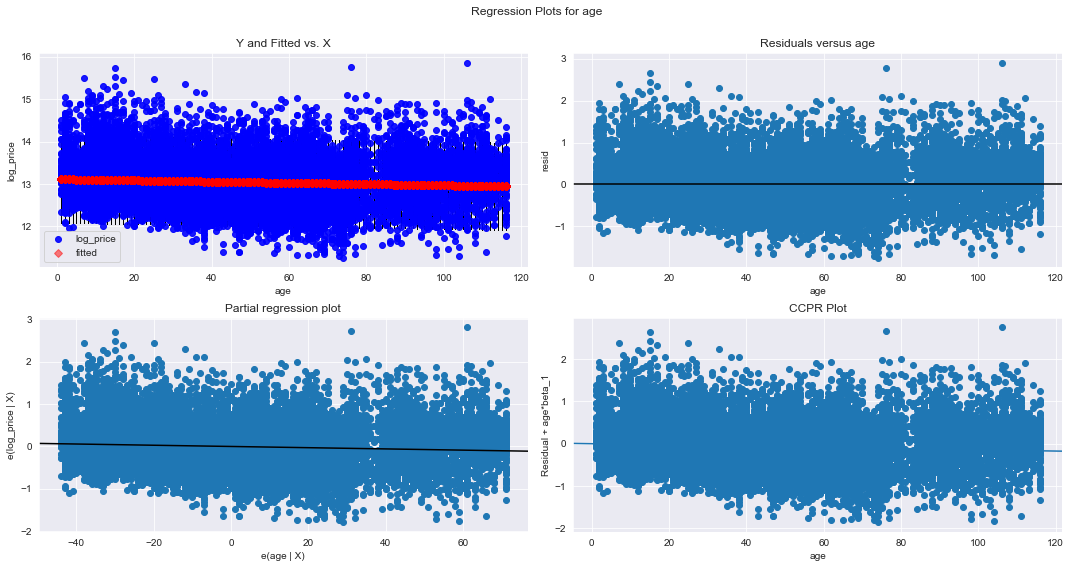

In [99]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "age", fig=fig)
plt.show()

In [88]:
f1 = 'age~price'
# create a fitted model in one line
model_2 = smf.ols(formula=f1, data=df_ren).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.367
Date:                Wed, 04 Dec 2019   Prob (F-statistic):             0.0669
Time:                        13:55:37   Log-Likelihood:                -3356.2
No. Observations:                 744   AIC:                             6716.
Df Residuals:                     742   BIC:                             6726.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.3645      1.280     61.234      0.000      75.852      80.877
price      -2.367e-06   1.29e-06     -1.835      0.067    -4.9e-06    1.66e-07
==============================================================================
Omnibus:                       69.319   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.392
Skew:                          -0.092   Prob(JB):                     1.37e-05
Kurtosis:                       2.170   Cond. No.                     1.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
f1 = 'age~price'
# create a fitted model in one line
model_3 = smf.ols(formula=f1, data=df_non_ren).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     141.3
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           1.78e-32
Time:                        13:56:22   Log-Likelihood:                -99709.
No. Observations:               20851   AIC:                         1.994e+05
Df Residuals:                   20849   BIC:                         1.994e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.4684      0.363    130.917      0.000      46.758      48.179
price      -6.755e-06   5.68e-07    -11.886      0.000   -7.87e-06   -5.64e-06
==============================================================================
Omnibus:                     1321.489   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1265.318
Skew:                           0.549   Prob(JB):                    1.74e-275
Kurtosis:                       2.499   Cond. No.                     1.16e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking the Condition Properties:

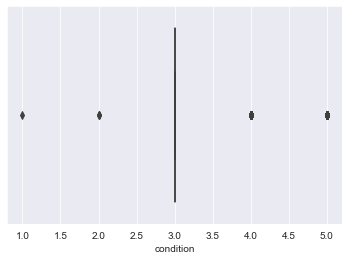

In [60]:
sns.boxplot(df_ren['condition'])

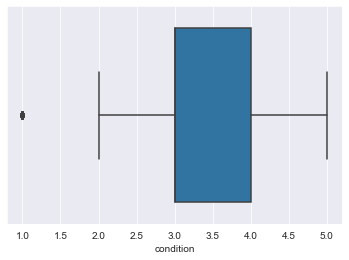

In [70]:
sns.boxplot(df_non_ren['condition'])

### Checking the Grade of Properties:

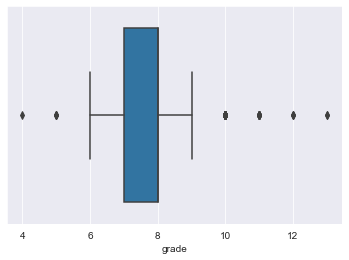

In [61]:
sns.boxplot(df_ren['grade'])

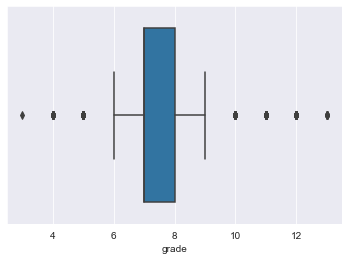

In [75]:
sns.boxplot(df_non_ren['grade'])

## Price compared to Age of property

First Overview Stats:

In [80]:
print("Median of Renovated Houses:", df_ren['age'].median())
print("Median of Non-Renovated Houses:", df_non_ren['age'].median())


print("Medain Time to Renocation in years", df_ren['time_to_ren'].median())

# year_biuilt - year renovated  = years since renovated.

Median of Renovated Houses: 74.5
Median of Non-Renovated Houses: 40.0
Medain Time to Renocation in years 54.0


### Age vs Price: For Renovated Not Renovated:

Data_1 Regression Diagnostics
----------------------------
Sample Size: 20851
Slope: -996.35
Y-Intercept: 575865.79
Correlation: -0.082
R-Squared: 0.007
----------------------------
Model: Y = -996.35 * X + 575865.79


Data_2 Regression Diagnostics
----------------------------
Sample Size: 744
Slope: -1908.09
Y-Intercept: 914955.28
Correlation: -0.082
R-Squared: 0.007
----------------------------
Model: Y = -1908.09 * X + 914955.28


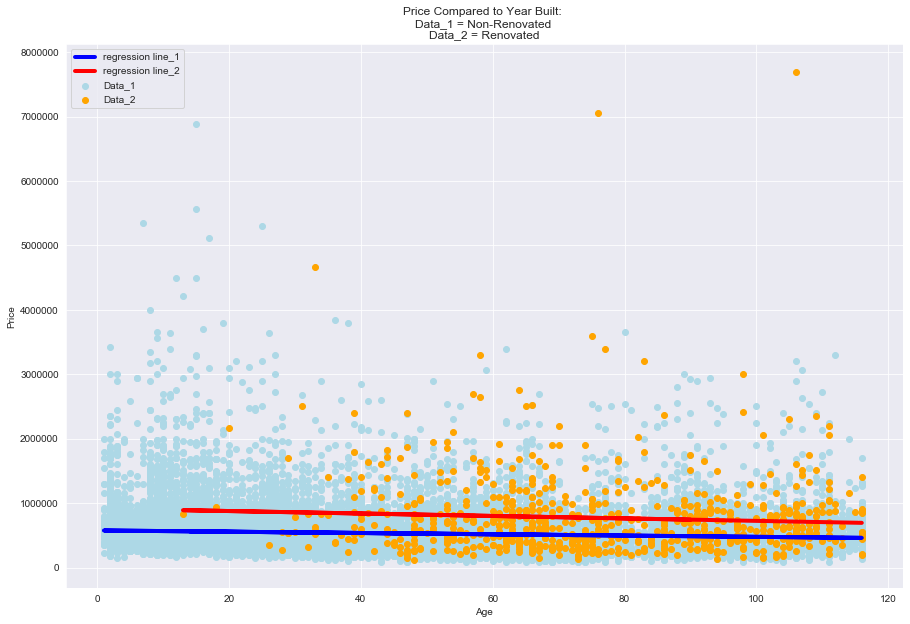

In [76]:
compare_reg_basic_and_plot(df_non_ren['age'], df_non_ren['price'], 
                           df_ren['age'], df_ren['price'], 
                           "Price Compared to Year Built: \nData_1 = Non-Renovated \nData_2 = Renovated",
                          "Age", "Price",)

In [82]:
# Y = -996.35 * X + 575865.79 = -1908.09 * X + 914955.28
def regresion_covergence(m1, m2, c1, c2):
    m = m1 - m2
    c = c2 - c1
    x = c/m
    return print("Age of property at convergence", round(x, 1), "Years Old")

In [83]:
# Y = -996.35 * X + 575865.79 = -1908.09 * X + 914955.28
regresion_covergence(-996.35, -1908.09, 575865.79, 914955.28)

Age of property at convergence 371.9 Years Old


### Accounting for that young properties are not renovated 

This creates a skew....

Because price decreases with age. Therefore as the properties which are renoveted are older. The The slope (coefficent will be larger that the non-renovated. As the "young" house's reduces the the coeffieecnt(slope) of the model.

Therefore create a DataFrame with House only older that 40 years old.

In [170]:
df_old_houses_ren = df_ren.loc[df_ren['age']> 40]
df_old_houses_ren.shape

(704, 34)

In [171]:
df_old_houses_non_ren = df_non_ren.loc[df_non_ren['age']> 40]
df_old_houses_non_ren.shape

(10222, 34)

Data_1 Regression Diagnostics
----------------------------
Sample Size: 10222
Slope: 2517.33
Y-Intercept: 316629.95
Correlation: 0.16
R-Squared: 0.025
----------------------------
Model: Y = 2517.33 * X + 316629.95


Data_2 Regression Diagnostics
----------------------------
Sample Size: 704
Slope: -1147.14
Y-Intercept: 848288.0
Correlation: 0.16
R-Squared: 0.025
----------------------------
Model: Y = -1147.14 * X + 848288.0


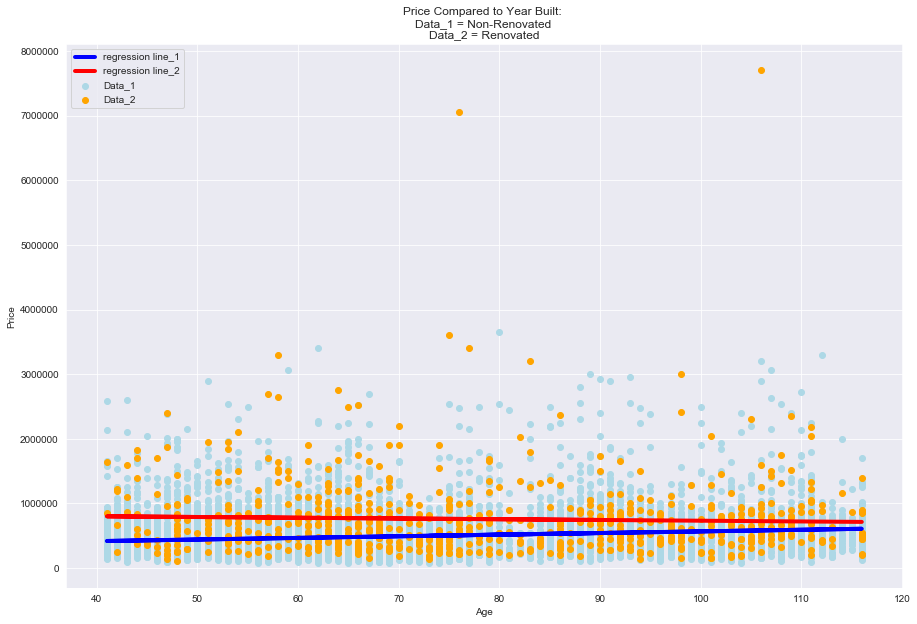

In [172]:
compare_reg_basic_and_plot(df_old_houses_non_ren['age'], df_old_houses_non_ren['price'], 
                           df_old_houses_ren['age'], df_old_houses_ren['price'], 
                           "Price Compared to Year Built: \nData_1 = Non-Renovated \nData_2 = Renovated",
                          "Age", "Price",)

In [84]:
# Y_r = -1147.14 * X + 848288.0
# Y_nr = 2517.33 * X + 316629.95

regresion_covergence(-1147.14, 2517.33, 848288, 316629.95)

Age of property at convergence 145.1 Years Old


### Price compared to: Time since renovation or if not renovated, Time since built.

In [117]:
(54/116)

0.46551724137931033

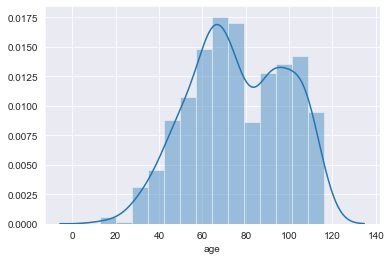

In [116]:
sns.distplot(df_ren['age'])

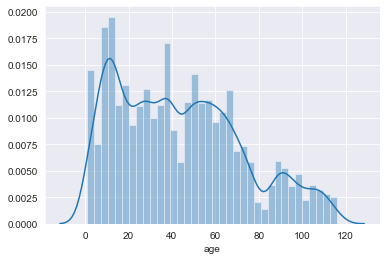

In [118]:
sns.distplot(df_non_ren['age'])

Number of non-renovated building over the median age for renovation

In [119]:
len(df_non_ren.loc[df_non_ren['age'] > 54])

7244

## Brake down in to Decade Class for year built

In [ ]:
def decade_brake_downs(DataFrame, decade):
    df_age = DataFrame.loc[DateFrame]

### 1900's:

In [83]:
df_1900 = df.loc[df['yr_built_bands'] == 1900]

In [94]:
df_1900.corr()['price'].sort_values(ascending=False)

price               1.000000
log_price           0.905809
price_list_level    0.819870
grade               0.796724
sqft_living         0.788938
sqft_above          0.763556
sqft_living15       0.686861
bathrooms           0.611327
floors              0.549737
bedrooms            0.408264
sqft_basement       0.400126
lat                 0.288162
view                0.248644
condition           0.172389
yr_renovated        0.132415
time_to_ren         0.132050
yr_built            0.078521
zipcode             0.076714
month               0.051123
Unnamed: 0          0.035733
waterfront          0.009066
sqft_lot           -0.003461
sqft_lot15         -0.018288
sale_count         -0.034663
year               -0.036958
day                -0.052832
id                 -0.067533
age                -0.078521
long               -0.143775
age_since_ren      -0.143870
yr_built_bands           NaN
Name: price, dtype: float64

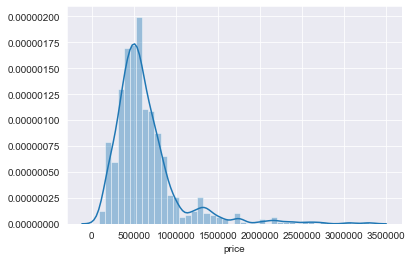

In [95]:
sns.distplot(df_1900['price'])

Basic Regression Diagnostics
----------------------------
Sample Size: 645
Slope: 0.369
Y-Intercept: 10.583
Correlation: 0.787
R-Squared: 0.62
----------------------------
Model: Y = 0.37 * X + 10.58


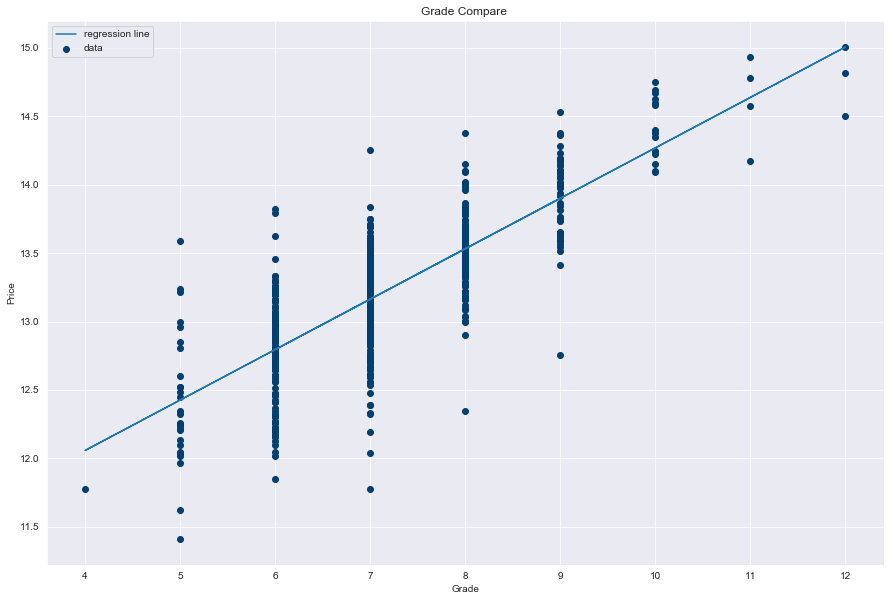

In [87]:
reg_basic_and_plot(df_1900['grade'], df_1900['log_price'],
                           "Grade Compare ", "Grade", "Price")

### Now broken down into decade bins:

In [ ]:
sns.barplot(sorted(df['yr_built_bands']), df['price'])

In [ ]:
sns.barplot(df, df['yr_built_bands'], df['yr_renovated'])

In [ ]:
p = sns.FacetGrid(df, col=['df[price_bands]'], row=df['is_ren'])
p = p.map(plt.hist, 'age')

In [ ]:
g = sns.FacetGrid(df, 
              col=sorted(df['yr_built_bands']), 
                         row=sorted(df['price_bands']))

g = g.map(plt.scatter, "price", "age")

In [ ]:
sns.scatterplot(data=df_ren, x=df_ren['age'], y=df_ren['price'])

In [ ]:
reg_basic_and_plot(df_ren['age'], df_ren['price'], "How Price is effect by Age of the Property")

### Analysis - Renovated House's 
From the above progression it shows that for every year the price will decrease by just over $2000 . This is a substanitall amount of money but is it significant compared to houses that have not been renovated?

First though as the equation is:

    Price = (-2045.39 * Age) + 924176.48
    
So lets look at the median house age and return the price.

In [ ]:
df_ren['age'].median()

In [ ]:
-2045.39*(df_ren['age'].median()) + 924176.48

In [ ]:
df_ren.columns

In [ ]:
df_ren['time_to_ren'].mode()

Check the correlation:

In [ ]:
df_ren.corr()['log_price'].sort_values(ascending=False)

In [ ]:
sns.scatterplot(data=df_non_ren, x=df_non_ren['age'], y=df_non_ren['price'])

In [ ]:
reg_basic_and_plot(df_non_ren['age'], df_non_ren['price'], "How Price is effect by Age of the Property, If a Renovation has been done")

### Analysis - If house not Renovated:

I this case the house price does decrease, but only by $996.65 per year. 

Benifit of not renovating: re

Just checking that all the non-renovated house have year built values. As in the initial dataframe the there were yr_bulit values equal to zero.

In [ ]:
# sorted(df_non_ren['yr_built'].unique())

## Comparing the finding the mean age of the building in each zipcode.

In [ ]:
def averages_dist_comparison(average, y_condition, x_condition, title):
    stats_y_condition = df.groupby([y_condition])[x_condition].average().apply(lambda x: format(x, 'f'))
    df_stats_y_condition = pd.DataFrame(stats_y_condition)
    avaerage_y_condition = df_stats_y_condition.rename(columns={str(y_condition): str(x_condition)})
    avaerage_y_condition.x_condition = avaerage_y_condition.x_condition.astype('float64')
    df_stats_y_condition = pd.DataFrame(avaerage_y_condition)
    df_stats_y_condition.sort_values(str(y_condition).plot(kind='barh', figsize=(15,15))
    plt.title(title)

In [ ]:
averages_dist_comparison('median', 'zipcode','condition', "test")

Text(0.5, 1.0, 'Mean Price in each Zipcode')

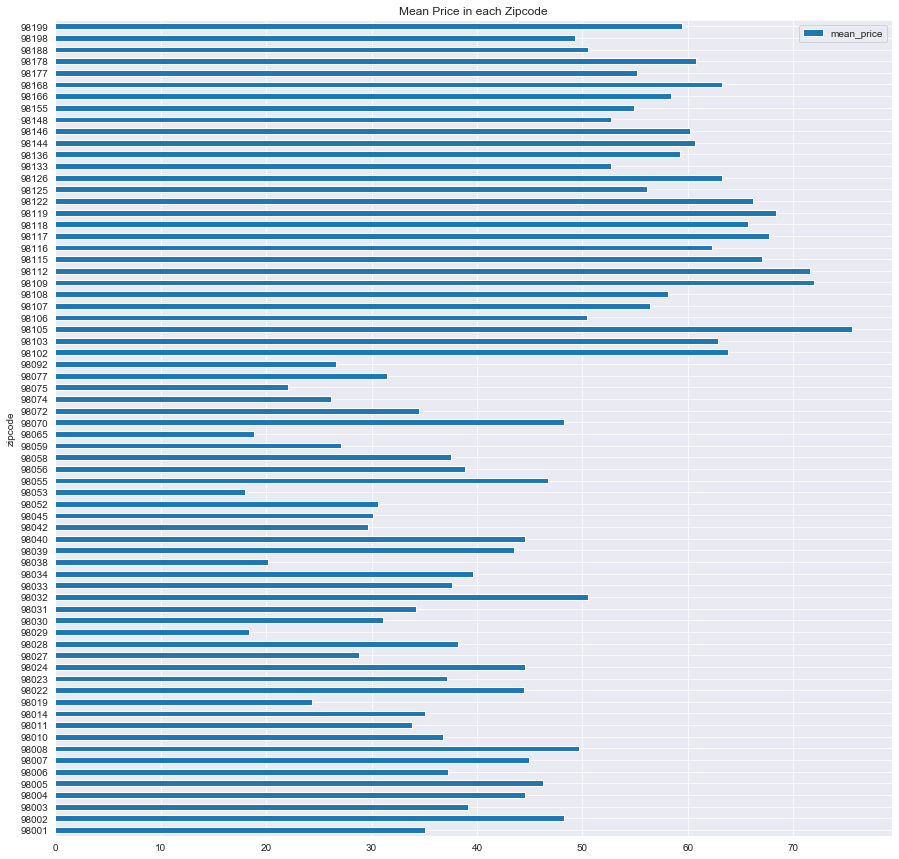

In [174]:
#found Mean price values of houses in each zipcode
stats_zipcode = df.groupby(['zipcode'])['age'].mean().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
mean_zipcode = df_stats_zipcode.rename(columns={"age": "mean_price"})
mean_zipcode.mean_price = mean_zipcode.mean_price.astype('float64')
df_mean_zipcode = pd.DataFrame(mean_zipcode)
df_mean_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Mean Price in each Zipcode')
# # df_mean_zipcode = df_stats_zipcode.rename(columns={"price": "mean_price"})
# # df2 = df_mean_zipcode['mean_price'].astype('float64')
# # sns.distplot(df_mean_zipcode)
# sns.barplot(x = ['zipcode'], y = ['mean_price'])
# # #clean this graph a little more

Check differance by median:

In [ ]:
stats_zipcode = df.groupby(['zipcode'])['age'].median().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
median_zipcode = df_stats_zipcode.rename(columns={"age": "median_price"})
median_zipcode.median_price = median_zipcode.median_price.astype('float64')
df_median_zipcode = pd.DataFrame(median_zipcode)
df_median_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Median Age in each Zipcode')

Look and median extra space in each zipxode

In [ ]:
stats_zipcode = df.groupby(['zipcode'])['extra_space'].median().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
median_zipcode = df_stats_zipcode.rename(columns={"zipcode": "extra_space"})
median_zipcode.extra_space = median_zipcode.extra_space.astype('float64')
df_median_zipcode = pd.DataFrame(median_zipcode)
df_median_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Median extra_space in each Zipcode')

In [ ]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="extra_space",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

In [ ]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="age",
             cmap="gist_heat_r", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

# Part 2 - Breaking the Houses Clasifications 

In this section we will be breaking down the houses into further catagorise and comapreing the non-renovated top the renovated in diffent metrics:

    2a. Price Bands
    2b. Number of Bedrooms
    2c. Number of Bathrooms
    2d. sqft_lot
    2e. sqft_living
    2f. Building Condition
    2g. Building Grade

### 2a. Price Band - Renovated

In [ ]:
sns.barplot(y=sorted(df_ren['price_bands']), x=df_ren['age']) # title="Price Bands to age of property"

In [ ]:
sns.scatterplot(y=sorted(df_ren['condition']), x=df_ren['grade'])

In [ ]:
# df_ren.set_index(df_ren['price_bands'])

In [ ]:
sns.lmplot(data=df, x="age", y="grade", hue="price_bands")

In [ ]:
sns.lmplot(data=df, x="age", y="price", hue="yr_built_bands")

In [ ]:
# reg_basic_and_plot()

## Renovated - Bedrooms

In [ ]:
sns.barplot(x=df_ren['bedrooms'], y=df_ren['price'])

## 2e. Square foot living

In [ ]:
reg_basic_and_plot(df['sqft_living'], df['price'], 'test')

In [ ]:
compare_reg_basic_and_plot(df_non_ren['sqft_living'], df_non_ren['price'], df_ren['sqft_living'], df_ren['price'], 
                           "Price Compared to sqft_living: \nData_1 = Non-Renovated \nData_2 = Renovated")

### Square foot living compared to square foot lot

In [ ]:
compare_reg_basic_and_plot(df_non_ren['sqft_living'], df_non_ren['sqft_lot'], df_ren['sqft_living'], df_ren['sqft_lot'], 
                           "Sqft_lot Compared to sqft_living: \nData_1 = Non-Renovated \nData_2 = Renovated")

This shows that living_space/lot_space  decrease if renovation is completed.

In [ ]:
df['extra_space'] = df['sqft_lot'] - df['sqft_living']

## 2f. Condition

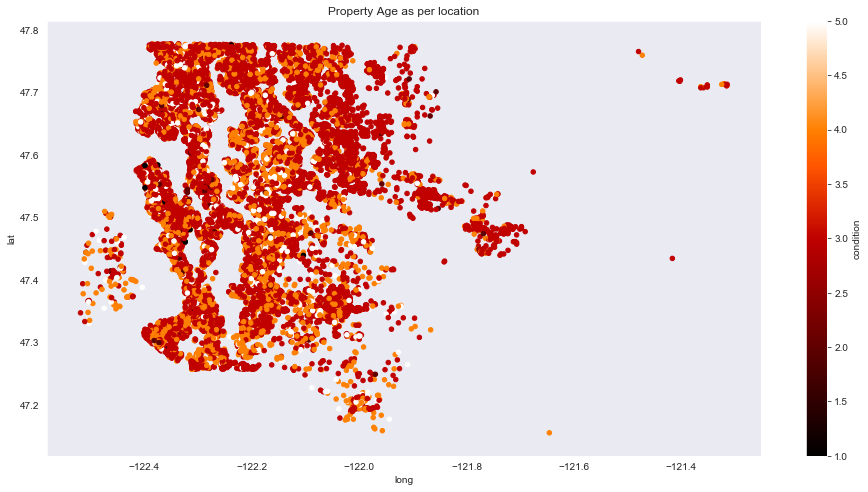

In [98]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="condition",
             cmap="gist_heat", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Property Age as per location')
plt.show()

Data_1 Regression Diagnostics
----------------------------
Sample Size: 20851
Slope: 23793.42
Y-Intercept: 450860.41
Correlation: 0.044
R-Squared: 0.002
----------------------------
Model: Y = 23793.42 * X + 450860.41


Data_2 Regression Diagnostics
----------------------------
Sample Size: 744
Slope: 36913.27
Y-Intercept: 650074.9
Correlation: 0.044
R-Squared: 0.002
----------------------------
Model: Y = 36913.27 * X + 650074.9


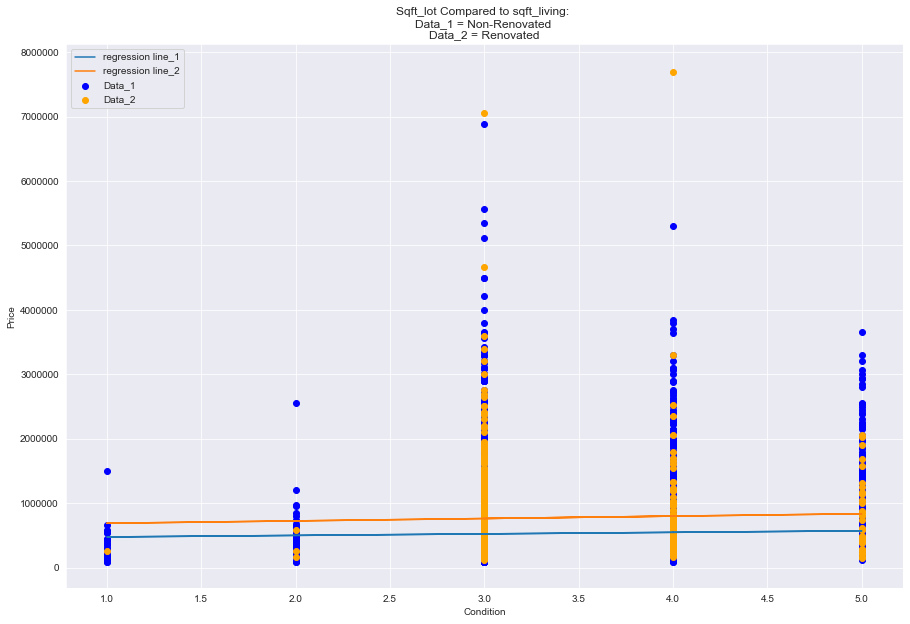

In [99]:
compare_reg_basic_and_plot(df_non_ren['condition'], df_non_ren['price'], 
                           df_ren['condition'], df_ren['price'], 
                           "Sqft_lot Compared to sqft_living: \nData_1 = Non-Renovated \nData_2 = Renovated",
                          "Condition", "Price")

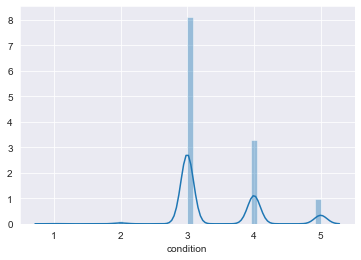

In [100]:
sns.distplot(df['condition'])

In [102]:
902107*0.009215096087057189

8313.0026858069

In [103]:
df['condition'].describe()

count    21595.000000
mean         3.409771
std          0.650480
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [104]:
df_bad_condition = df.loc[df['condition'] < 3]
df_bad_condition.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,year,month,day,price_list_level,yr_built_bands,age,sale_count,age_since_ren,time_to_ren,log_price
count,199.000000,1.990000e+02,1.990000e+02,199.000000,199.000000,199.000000,1.990000e+02,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,10168.010050,4.267549e+09,3.300570e+05,2.814070,1.424623,1395.628141,3.117163e+04,1.158291,0.010050,0.110553,...,2014.407035,6.190955,15.618090,3.703518,1941.557789,69.778894,1.050251,68.859296,-1906.442211,12.535413
std,5672.247093,2.871220e+09,2.503306e+05,0.985041,0.553316,668.355046,9.612199e+04,0.327709,0.099997,0.557628,...,0.492521,3.569472,9.087947,1.830587,23.742844,23.959380,0.240973,24.217456,281.319197,0.560425
min,36.000000,7.200080e+06,7.800000e+04,1.000000,0.750000,410.000000,1.638000e+03,1.000000,0.000000,0.000000,...,2014.000000,1.000000,1.000000,1.000000,1900.000000,21.000000,1.000000,20.000000,-1995.000000,11.264464
25%,5152.500000,1.900000e+09,1.895000e+05,2.000000,1.000000,935.000000,6.000000e+03,1.000000,0.000000,0.000000,...,2014.000000,3.000000,7.000000,2.000000,1920.000000,52.000000,1.000000,51.000000,-1963.000000,12.152141
50%,10776.000000,3.501100e+09,2.790000e+05,3.000000,1.000000,1270.000000,8.400000e+03,1.000000,0.000000,0.000000,...,2014.000000,6.000000,16.000000,3.000000,1940.000000,67.000000,1.000000,67.000000,-1949.000000,12.538967
75%,14930.000000,6.803000e+09,4.025000e+05,3.000000,1.750000,1685.000000,1.615300e+04,1.000000,0.000000,0.000000,...,2015.000000,9.000000,24.000000,5.000000,1960.000000,90.000000,1.000000,89.000000,-1925.000000,12.905431
max,19605.000000,9.828702e+09,2.560000e+06,6.000000,3.000000,5440.000000,1.164794e+06,2.000000,1.000000,4.000000,...,2015.000000,12.000000,31.000000,10.000000,1990.000000,116.000000,3.000000,116.000000,82.000000,14.755518


In [101]:
(len(df_bad_condition)/len(df))*100

NameError: name 'df_bad_condition' is not defined

In [108]:
len(df['zipcode'].unique())

70

In [ ]:
stats_zipcode = df.groupby(['zipcode'])['condition'].median().apply(lambda x: format(x, 'f'))
df_stats_zipcode = pd.DataFrame(stats_zipcode)
median_zipcode = df_stats_zipcode.rename(columns={"zipcode": "condition"})
median_zipcode.extra_space = median_zipcode.condition.astype('float64')
df_median_zipcode = pd.DataFrame(median_zipcode)
df_median_zipcode.sort_values('zipcode').plot(kind='barh', figsize=(15,15))
plt.title('Median extra_space in each Zipcode')

# Investigation into Log Living Space & Log Price